In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
data = pd.read_csv("cleanData/data.csv")
y = pd.read_csv("cleanData/y.csv", header = None)
y = y[0]

In [3]:
# Random Forests
rf = RandomForestClassifier(random_state = randomState)
train_sizes, train_scores, test_scores = learning_curve(estimator = rf, 
                                                        X = data, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)

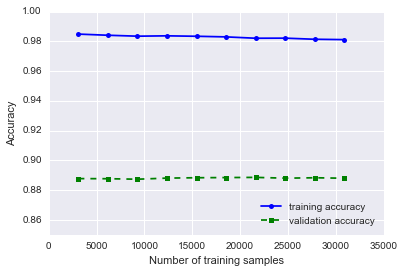

In [4]:
# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1.0])
plt.show()

In [5]:
print("Accuracy with full training : " + str(test_means[9]))
print("Training accuracy is much better, but a lot of overfitting here") 

Accuracy with full training : 0.88798679227
Training accuracy is much better, but a lot of overfitting here


In [6]:
# Plotting accuracy as a function of the model parameter n_estimators 
param_range = [10, 30, 100, 300, 1000]
train_scores, test_scores = validation_curve(estimator = rf, 
                                             X = data, 
                                             y = y,
                                             param_name = "n_estimators", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

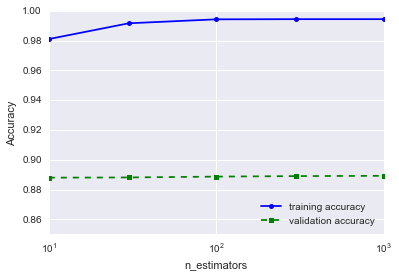

In [7]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1])
plt.show()

In [8]:
print(test_means)
print("Seems like there's no real need to use more than 300 iterations") 

[ 0.88798679  0.88812275  0.88868603  0.88903564  0.88921045]
Seems like there's no real need to use more than 100 iterations


In [10]:
# Plotting accuracy as a function of the model parameter max_depth 
rf = RandomForestClassifier(random_state = randomState, 
                            n_estimators = 100)
param_range = [1, 2, 3, 4, 5, 10, 20]
train_scores, test_scores = validation_curve(estimator = rf, 
                                             X = data, 
                                             y = y,
                                             param_name = "max_depth", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

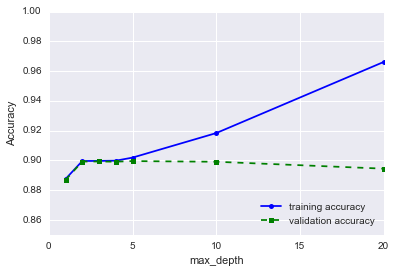

In [11]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1])
plt.show()

In [13]:
print("Interesting : seems adding a lot of depth not only creates overfitting, but actually decreases validation accuracy")
print(test_means)
print("We will use max_depth = 5")

Interesting : seems adding a lot of depth not only creates overfitting, but actually decreases validation accuracy
[ 0.88687967  0.89921336  0.89923279  0.89911625  0.89950471  0.89905798
  0.89441585]
We will use max_depth = 5


In [16]:
# Plotting accuracy as a function of the model parameter min_samples_leaf 
rf = RandomForestClassifier(random_state = randomState, 
                            n_estimators = 100, 
                            max_depth = 5)
param_range = [1, 2, 3, 4, 5, 10, 20]
train_scores, test_scores = validation_curve(estimator = rf, 
                                             X = data, 
                                             y = y,
                                             param_name = "min_samples_leaf", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

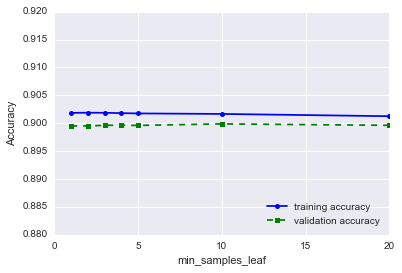

In [17]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [19]:
print(test_means)
print("Not much impact. We will use the default min_samples_leaf = 1")

[ 0.89950471  0.89950471  0.89962125  0.89964067  0.89960183  0.89987375
  0.89962125]
Not much impact. We will use the default min_samples_leaf = 1


In [20]:
# Plotting accuracy as a function of the model parameter min_samples_split  
rf = RandomForestClassifier(random_state = randomState, 
                            n_estimators = 100, 
                            max_depth = 5)
param_range = [1, 2, 3, 4, 5, 10, 20]
train_scores, test_scores = validation_curve(estimator = rf, 
                                             X = data, 
                                             y = y,
                                             param_name = "min_samples_split", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

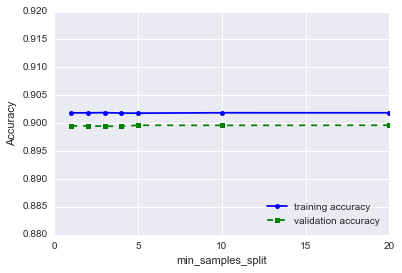

In [21]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [22]:
print(test_means)
print("Not much impact. We will use the default min_samples_split = 2")

[ 0.89950471  0.89950471  0.89944644  0.89944644  0.89962125  0.89960183
  0.89962125]
Not much impact. We will use the default min_samples_leaf = 1


In [23]:
# Final model score
# Let's get validation accuracy with updated parameters
rf = RandomForestClassifier(random_state = randomState, 
                            n_estimators = 300, 
                            max_depth = 5)
scores = cross_val_score(estimator = rf, 
                         X = data, 
                         y = y, 
                         cv = ShuffleSplit(n_splits = 5, 
                                           test_size = 0.25, 
                                           random_state = randomState), 
                         n_jobs = njobs)
print("Accuracy : " + str(np.mean(scores)))

Accuracy : 0.899543556376


In [24]:
print("All 3 models have very similar accuracy so far.")

All 3 models have very similar accuracy so far.


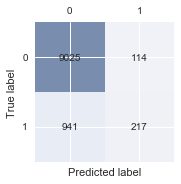

In [27]:
# Plotting the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = randomState)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.5)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) : 
        ax.text(x = j, y = i, s = confmat[i, j], va = "center", ha = "center")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

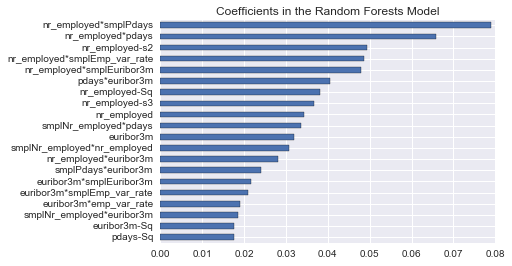

In [31]:
# Get the coefficients to see the most important features
coefs = pd.Series(rf.feature_importances_, index = X_train.columns)
imp_coefs = coefs.sort_values().tail(20)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forests Model")
plt.figure(figsize=(10, 5))

In [29]:
print("1* Almost all of the most important features in the RF model are features we created")
print("2* Only 'original' features appearing in the top 20 are nr_employed and euribor3m, which are both social and economic \
context attributes")

1* Almost all of the most important features in the RF model are features we created
2* Only 'original' features appearing in the top 20 are nr_employed and euribor3m, which are both social and economic context attributes
